In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz

%matplotlib inline

In [4]:

delta = 2 * np.pi
g = 0.25
# hamiltonian
H = delta / 2.0 * sigmax()
# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

Time-evolution

In [6]:
res = mesolve(H, psi0, tlist, c_ops, [sigmaz()])

In [7]:
sz_analytic = np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)

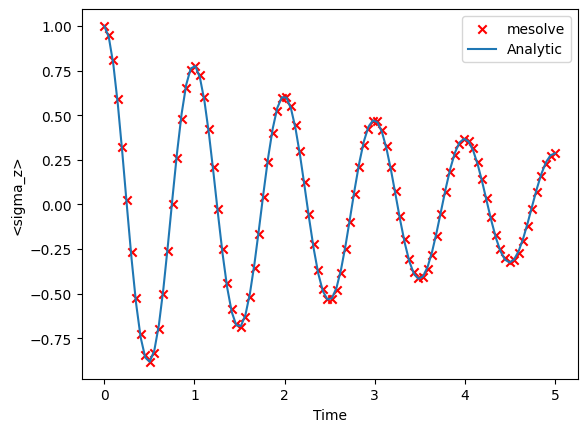

In [8]:
plt.scatter(tlist, res.expect[0], c="r", marker="x", label="mesolve")
plt.plot(tlist, sz_analytic, label="Analytic")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend();

Qubit Dynamics on the Bloch Sphere
# $H = \Delta ( \, cos(\theta) \, \sigma_z + sin(\theta) \, \sigma_x  \, )$.

In [9]:
theta = 0.2 * np.pi
H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())
# Time Evolution
tlist = np.linspace(0, 5, 1000)
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

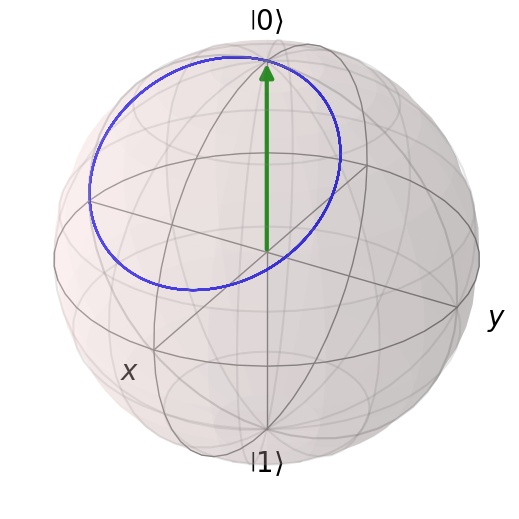

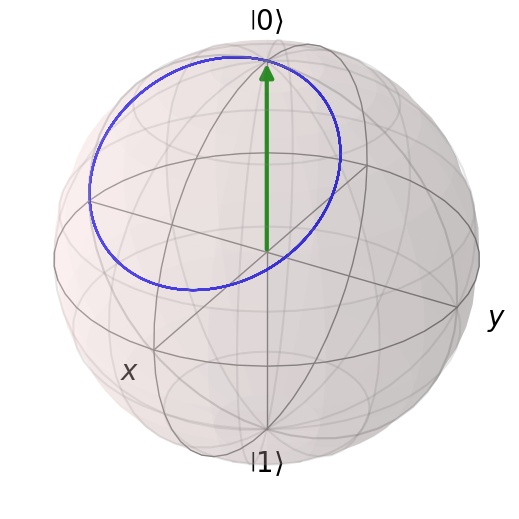

In [11]:
# Extract expectation values for pauli matrices
exp_sx_circ, exp_sy_circ, exp_sz_circ = result.expect
exp_sx_circ, exp_sy_circ, exp_sz_circ = (
    np.array(exp_sx_circ),
    np.array(exp_sy_circ),
    np.array(exp_sz_circ),
)

# Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_circ, exp_sy_circ, exp_sz_circ], meth="l")
sphere.add_states(psi0)
sphere.show()